# K-means 簡單介紹

1. K-means是一種`非監督式學習`的演算法，演算法透過資料之間「距離」，將資料進行分群。
2. 開始前要先決定好總共要將分為資料分為多少群(K)。

> 非監督學習表示資料本身並是沒有標籤的(unlabeled)，只有資料本身的特徵，也就是說我們並不知道每一筆資料的答案是什麼，只能透過每筆資料的特徵來進行學習。



### 演算法
1. 決定好要將資料分為多少群(K)
2. 隨機給定K個中心點(群心)
3. 將每筆資料的組別指定為距離最近那個群心的組別
4. 根據每個資料的群組重新計算中心點
5. 重複步驟3, 4，直到收斂

## 簡單的範例

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
heights = [
    160, 162, 165, 192, 160, 
    190, 179, 170, 165, 165, 
    174, 183, 176, 154, 192, 
    163, 164, 172, 175, 140]
weights = [
    80, 52, 60, 100, 78, 
    79, 78, 50, 42, 80,
    98, 97, 96, 95, 94,
    65, 66, 67, 68, 45]
data = pd.DataFrame({'Height': heights, 'Weight': weights})

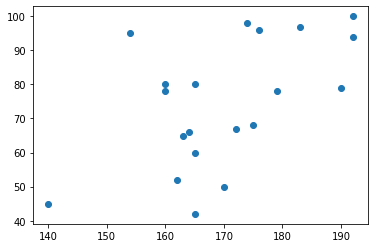

In [3]:
plt.scatter(data['Height'], data['Weight'])

### 將身高與體重進行標準化
在開始 K-means 演算法之前，我們先對資料進行標準化(Normalize)，將每個特徵調整到相同的尺度下進行計算，這樣算出來的距離可避免偏差。

#### 四種常見的標準化方式
1. Min-Max
$$ X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}} $$
2. Z-score ($\mu$為平均值、$\sigma$為標準差)
$$ Z = \frac{X - \mu}{\sigma} $$
3. MaxAbs
$$ X_{norm} = \frac{X}{{|X_{max}|}} $$
4. Robust scalar
$$ X_{scaled} = \frac{X — X_{median}}{IQR} $$
IQR(interquartile difference range) 是 75百分位和25百分位的差值，適用在觀察有大的離異值(outlier)。 

     IQR = 75th quantile — 25th quantile

In [4]:
# 使用Min-Max的方式將身高與體重進行正規化
data['HeightNorm'] = ((data['Height'] - min(data['Height']))
                       / (max(data['Height']) - min(data['Height'])))
data['WeightNorm'] = ((data['Weight'] - min(data['Weight']))
                       / (max(data['Weight']) - min(data['Weight'])))
data

,Height,Weight,HeightNorm,WeightNorm
0,160,80,0.384615,0.655172
1,162,52,0.423077,0.172414
2,165,60,0.480769,0.310345
3,192,100,1.000000,1.000000
4,160,78,0.384615,0.620690
5,190,79,0.961538,0.637931
6,179,78,0.750000,0.620690
7,170,50,0.576923,0.137931
8,165,42,0.480769,0.000000
9,165,80,0.480769,0.655172


In [5]:
# 使用 z-score 的方式將身高與體重進行標準化
data['HeightNorm'] = (data['Height'] - data.mean().Height) / data.std().Height
                       
data['WeightNorm'] = (data['Weight'] - data.mean().Weight) / data.std().Weight
                      
data

,Height,Weight,HeightNorm,WeightNorm
0,160,80,-0.765025,0.295525
1,162,52,-0.612781,-1.208964
2,165,60,-0.384415,-0.779110
3,192,100,1.670875,1.370159
4,160,78,-0.765025,0.188061
5,190,79,1.518631,0.241793
6,179,78,0.681291,0.188061
7,170,50,-0.003806,-1.316427
8,165,42,-0.384415,-1.746281
9,165,80,-0.384415,0.295525


In [7]:
# 使用 MaxAbs 的方式將身高與體重進行標準化
data['HeightNorm'] = (data['Height']  / abs(max(data['Height'])))
                       
data['WeightNorm'] = (data['Weight'] / abs(max(data['Weight'])))
                      
data

,Height,Weight,HeightNorm,WeightNorm
0,160,80,0.833333,0.80
1,162,52,0.843750,0.52
2,165,60,0.859375,0.60
3,192,100,1.000000,1.00
4,160,78,0.833333,0.78
5,190,79,0.989583,0.79
6,179,78,0.932292,0.78
7,170,50,0.885417,0.50
8,165,42,0.859375,0.42
9,165,80,0.859375,0.80


In [8]:
# 使用 Robust scalar 的方式將身高與體重進行標準化
data['HeightNorm'] = (data['Height'] - data.median().Height) / (data.quantile(0.75).Height-data.quantile(0.25).Height)
                       
data['WeightNorm'] = (data['Weight'] - data.median().Weight) / (data.quantile(0.75).Weight-data.quantile(0.25).Weight)
                      
data

,Height,Weight,HeightNorm,WeightNorm
0,160,80,-0.535714,0.065574
1,162,52,-0.392857,-0.852459
2,165,60,-0.178571,-0.590164
3,192,100,1.750000,0.721311
4,160,78,-0.535714,0.000000
5,190,79,1.607143,0.032787
6,179,78,0.821429,0.000000
7,170,50,0.178571,-0.918033
8,165,42,-0.178571,-1.180328
9,165,80,-0.178571,0.065574


## 可使用 scikit- learn 套件  

### Min-Max的方式

from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler()  
data_scaled = scaler.fit_transform(data) 

### z-score 的方式 

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
data_scaled = scaler.fit_transform(data) 

### MaxAbs 的方式

from sklearn.preprocessing import MaxAbsScaler  
maxabs = MaxAbsScaler()  
data_maxabs = maxabs.fit_transform(data) 


### Robust scalar (IQR) 的方式

from sklearn.preprocessing import RobustScaler  
scaler = RobustScaler()  
data_scaled = scaler.fit_transform(data) 

In [9]:
# Example for pd.values
df = pd.DataFrame({'age':[ 3,  29],'height': [94, 170],'weight': [31, 115]})
df

,age,height,weight
0,3,94,31
1,29,170,115


In [10]:
df.dtypes

age       int64
height    int64
weight    int64
dtype: object

In [11]:
df.values    # Return a Numpy representation of the DataFrame.

array([[  3,  94,  31],
       [ 29, 170, 115]], dtype=int64)

In [12]:
#Example for pd.sample for random sampling items from an axis of object.
df = pd.DataFrame({'age':[ 3,  29, 32, 40],'height': [94, 170, 168, 180],'weight': [31, 110, 60, 80]})
df

,age,height,weight
0,3,94,31
1,29,170,110
2,32,168,60
3,40,180,80


In [16]:
df.sample(n=2, random_state=1)

,age,height,weight
3,40,180,80
2,32,168,60


In [17]:
df['age'].sample(n=2, random_state=10)

2    32
0     3
Name: age, dtype: int64

In [19]:
df[['age','height']].sample(n=2, random_state=10)

,age,height
2,32,168
0,3,94


In [20]:
# zip 的常用於同時遍歷多個列表資料，經常和enumerate同時使用
seq1=['foo','bar','baz']
seq2=['one','two','three']
for i,(a,b) in enumerate(zip(seq1,seq2)):
    print('{}:({},{})'.format(i,a,b))

0:(foo,one)
1:(bar,two)
2:(baz,three)


In [22]:
# 決定好要將資料分為多少群(K)
k = 2
# 隨機給定K個中心點(群心)
values = data[['HeightNorm', 'WeightNorm']].sample(k, random_state=0).values
centerxs = []
centerys = []
print(values)
for x in values:
    centerxs.append(x[0])
    centerys.append(x[1])
centerxs, centerys

[[ 0.53571429 -0.32786885]
 [-0.39285714 -0.85245902]]


([0.5357142857142857, -0.39285714285714285],
 [-0.32786885245901637, -0.8524590163934426])

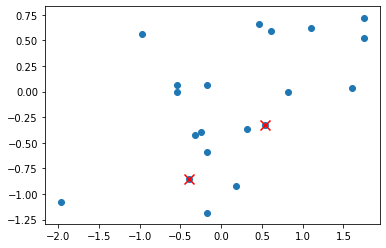

In [24]:
plt.scatter(data['HeightNorm'], data['WeightNorm'])
plt.scatter(centerxs, centerys, c='r', marker='x', s=100)

In [26]:
# 將每筆資料的組別指定為距離最近那個群心的組別
def assign_group():
    def assign(data):
        mindist2 = None
        group = None
        for i, (x, y) in enumerate(zip(centerxs, centerys)):
            dist2 = ((data['HeightNorm']-x)**2
                     + (data['WeightNorm']-y)**2)
            if (mindist2 is None) or (dist2 < mindist2):
                mindist2 = dist2
                group = i
        return group
    data['Group'] = data.apply(assign, axis='columns')
    
assign_group()
data

,Height,Weight,HeightNorm,WeightNorm,Group
0,160,80,-0.535714,0.065574,1
1,162,52,-0.392857,-0.852459,1
2,165,60,-0.178571,-0.590164,1
3,192,100,1.750000,0.721311,0
4,160,78,-0.535714,0.000000,1
5,190,79,1.607143,0.032787,0
6,179,78,0.821429,0.000000,0
7,170,50,0.178571,-0.918033,1
8,165,42,-0.178571,-1.180328,1
9,165,80,-0.178571,0.065574,0


In [28]:
# 根據每個資料的群組重新計算中心點
def calc_centers():
    for group in range(len(centerxs)):
        centerxs[group] = data[data['Group']==group]['HeightNorm'].mean()
        centerys[group] = data[data['Group']==group]['WeightNorm'].mean()
calc_centers()

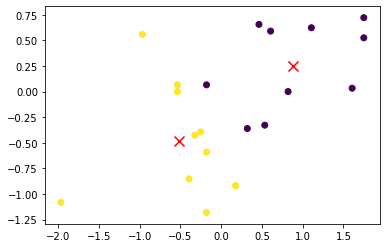

In [30]:
plt.scatter(data['HeightNorm'], data['WeightNorm'], c=data['Group'])
plt.scatter(centerxs, centerys, c='r', marker='x', s=100)

In [31]:
# 重複步驟3, 4
iter_times = 10
for i in range(iter_times):
    assign_group()
    calc_centers()

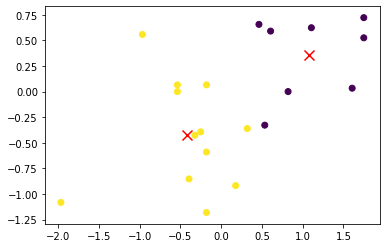

In [32]:
plt.scatter(data['HeightNorm'], data['WeightNorm'], c=data['Group'])
plt.scatter(centerxs, centerys, c='r', marker='x', s=100)

## 使用Scikit-learn中的套件

In [33]:
from sklearn.cluster import KMeans
KMeans?

In [34]:
kmeans = KMeans(n_clusters=k, random_state=0).fit(
    data[['HeightNorm', 'WeightNorm']])
data['Group'] = kmeans.labels_
centers = kmeans.cluster_centers_

In [35]:
centerxs = [x for x, y in centers]
centerys = [y for x, y in centers]

Sum of squared distances of samples to their closest cluster center is 10.114295110414762


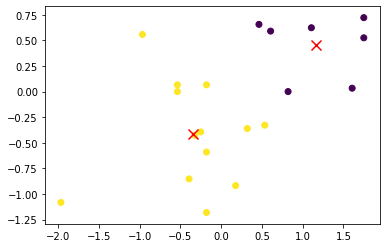

In [36]:
plt.scatter(data['HeightNorm'], data['WeightNorm'], c=data['Group'])
plt.scatter(centerxs, centerys, c='r', marker='x', s=100)
print("Sum of squared distances of samples to their closest cluster center is", kmeans.inertia_)

### Hierarchical Clustering Model

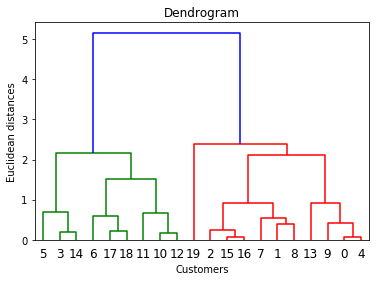

In [37]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data[['HeightNorm', 'WeightNorm']], method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [38]:
sch.dendrogram?

In [39]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')

# 'ward’：單鏈接single-linkage
# ‘complete’：全鏈接complete-linkage算法
# ‘average’：均連接average-linkage(UPGMA)算法

In [43]:
data['Group']=hc.fit_predict(data[['HeightNorm', 'WeightNorm']])

<function matplotlib.pyplot.show(*args, **kw)>

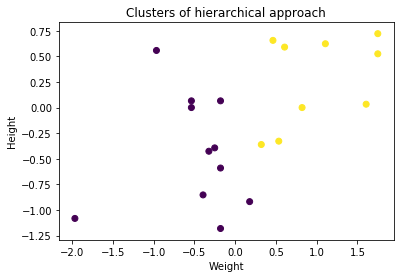

In [44]:
plt.scatter(data['HeightNorm'], data['WeightNorm'], c=data['Group'])
plt.title('Clusters of hierarchical approach')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show